In [7]:
import pandas as pd
workshop = pd.read_csv('/Users/jacobyang/Downloads/Fall 2021 Week 5 Linkedin.csv')
workshop

,Meeting ID,Topic,Start Time,End Time,User Email,Duration (Minutes),Participants,Unnamed: 7
0,98204212788,UES Externship: LinkedIn & Networking Workshop,10/25/2021 07:41:09 PM,10/25/2021 09:27:40 PM,l5wei@ucsd.edu,107,100.0,NaN
1,Name (Original Name),User Email,Join Time,Leave Time,Duration (Minutes),Guest,NaN,NaN
2,Lillian Wei (she/her) | VP Marketing (Lillian ...,l5wei@ucsd.edu,10/25/2021 07:41:09 PM,10/25/2021 08:30:49 PM,50,No,NaN,NaN
3,Baishuo(Mike) Zhou,b7zhou@ucsd.edu,10/25/2021 07:41:34 PM,10/25/2021 08:03:12 PM,22,No,NaN,NaN
4,Kelly Jan,kgjan@ucsd.edu,10/25/2021 07:41:53 PM,10/25/2021 07:42:02 PM,1,No,NaN,NaN
...,...,...,...,...,...,...,...,...
347,Laith Elqaq,lelqaq@ucsd.edu,10/25/2021 08:51:19 PM,10/25/2021 09:00:49 PM,10,Yes,NaN,NaN
348,Margaret Liu (she/her),mal014@ucsd.edu,10/25/2021 08:51:19 PM,10/25/2021 09:00:46 PM,10,No,NaN,NaN
349,Samantha Fu,sfu@ucsd.edu,10/25/2021 08:51:20 PM,10/25/2021 09:00:49 PM,10,No,NaN,NaN
350,Vincent Le,v2le@ucsd.edu,10/25/2021 08:51:21 PM,10/25/2021 09:00:49 PM,10,No,NaN,NaN


In [8]:
workshop = workshop.get(['Meeting ID', 'Topic', 'User Email'])

In [9]:
workshop.rename(columns = {'Meeting ID':'Name', 'Topic':'Email', 'User Email':'Duration (Minutes)'}, inplace = True)

/Users/jacobyang/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [10]:
workshopReduced = workshop.drop([0,1]).reset_index().get(['Email', 'Duration (Minutes)'])
workshopReduced

,Email,Duration (Minutes)
0,l5wei@ucsd.edu,50
1,b7zhou@ucsd.edu,22
2,kgjan@ucsd.edu,1
3,kgjan@ucsd.edu,49
4,p5tan@ucsd.edu,1
...,...,...
345,lelqaq@ucsd.edu,10
346,mal014@ucsd.edu,10
347,sfu@ucsd.edu,10
348,v2le@ucsd.edu,10


In [11]:
workshopReduced['Duration (Minutes)'] = workshopReduced['Duration (Minutes)'].astype(int)

In [12]:
workshopReduced = workshopReduced.groupby(by=['Email']).sum()
workshopReduced

,Duration (Minutes)
Email,
a1son@ucsd.edu,64
a3sinha@ucsd.edu,38
a5ortiz@ucsd.edu,63
achow@ucsd.edu,40
ajahmad@ucsd.edu,62
...,...
xix015@ucsd.edu,61
xiz115@ucsd.edu,40
y3ge@ucsd.edu,64


In [13]:
selectedColumn = workshopReduced['Duration (Minutes)']
workshopTimes = selectedColumn.copy()
workshopTimes

Email
a1son@ucsd.edu       64
a3sinha@ucsd.edu     38
a5ortiz@ucsd.edu     63
achow@ucsd.edu       40
ajahmad@ucsd.edu     62
                   ... 
xix015@ucsd.edu      61
xiz115@ucsd.edu      40
y3ge@ucsd.edu        64
yrzhang@ucsd.edu    107
zgee@ucsd.edu        64
Name: Duration (Minutes), Length: 87, dtype: int64

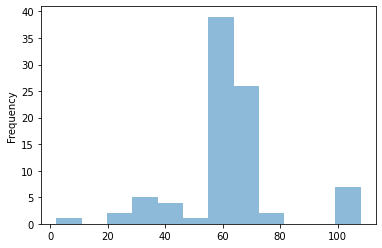

In [14]:
ax = workshopTimes.plot.hist(bins=12, alpha=0.5)

In [15]:
workshopReduced.rename(columns = {'Duration (Minutes)': 'Week 5 Linkedln'}, inplace = True)
workshopReduced = workshopReduced.reset_index()
workshopReduced

,Email,Week 5 Linkedln
0,a1son@ucsd.edu,64
1,a3sinha@ucsd.edu,38
2,a5ortiz@ucsd.edu,63
3,achow@ucsd.edu,40
4,ajahmad@ucsd.edu,62
...,...,...
82,xix015@ucsd.edu,61
83,xiz115@ucsd.edu,40
84,y3ge@ucsd.edu,64
85,yrzhang@ucsd.edu,107
